In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mice-protein-expression/Data_Cortex_Nuclear.csv


Source:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4939633/

In [2]:
mice=pd.read_csv('/kaggle/input/mice-protein-expression/Data_Cortex_Nuclear.csv')
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
stats=mice.describe()
stats

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
mice['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

Control group, and mice with down syndrome

In [5]:
mice['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

Treated with saline or memantine

In [6]:
mice['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

Stimulated to learn (context shock) or not stimulated to learn (no context shock)

In [7]:
mice['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-SC-m    135
t-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

In [8]:
mice.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.959512,0.359433,0.294526,0.325063,-0.180959,-0.093737,-0.180169,0.047299,0.791173,...,-0.199363,-0.253175,-0.167358,-0.326577,-0.228488,-0.047246,-0.384816,-0.323397,-0.473734,0.476033
ITSN1_N,0.959512,1.000000,0.459884,0.422492,0.426182,-0.147775,-0.076507,-0.132870,0.171122,0.780926,...,-0.200833,-0.327136,-0.257745,-0.256573,-0.309593,0.042422,-0.347339,-0.399856,-0.511433,0.517782
BDNF_N,0.359433,0.459884,1.000000,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,...,-0.080776,-0.186508,-0.146526,0.127703,-0.254218,0.450433,-0.135637,-0.239907,-0.244732,0.262578
NR1_N,0.294526,0.422492,0.805784,1.000000,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,...,-0.141423,-0.386577,-0.321790,0.264181,-0.374932,0.473366,-0.234171,-0.319672,-0.351958,0.205463
NR2A_N,0.325063,0.426182,0.749993,0.873889,1.000000,0.110172,0.111143,0.280733,0.392695,0.409502,...,-0.259166,-0.449268,-0.297453,0.262492,-0.434530,0.400526,-0.314210,-0.346987,-0.454366,0.187292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.047246,0.042422,0.450433,0.473366,0.400526,0.248531,0.284492,0.244965,0.413060,0.039426,...,0.056826,0.052303,0.039724,0.423405,-0.039379,1.000000,0.031898,0.098065,-0.010347,0.246107
H3AcK18_N,-0.384816,-0.347339,-0.135637,-0.234171,-0.314210,0.338456,0.301049,0.193369,0.235879,-0.259559,...,0.241714,0.465087,0.379046,0.138683,0.286105,0.031898,1.000000,0.332770,0.769093,-0.239835
EGR1_N,-0.323397,-0.399856,-0.239907,-0.319672,-0.346987,0.280476,0.349281,0.079262,-0.117623,-0.202839,...,0.378905,0.805637,0.841650,0.239695,0.725289,0.098065,0.332770,1.000000,0.731871,-0.470487
H3MeK4_N,-0.473734,-0.511433,-0.244732,-0.351958,-0.454366,0.383404,0.402397,0.065615,0.056099,-0.277555,...,0.324445,0.749225,0.712321,0.222595,0.558868,-0.010347,0.769093,0.731871,1.000000,-0.404005


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

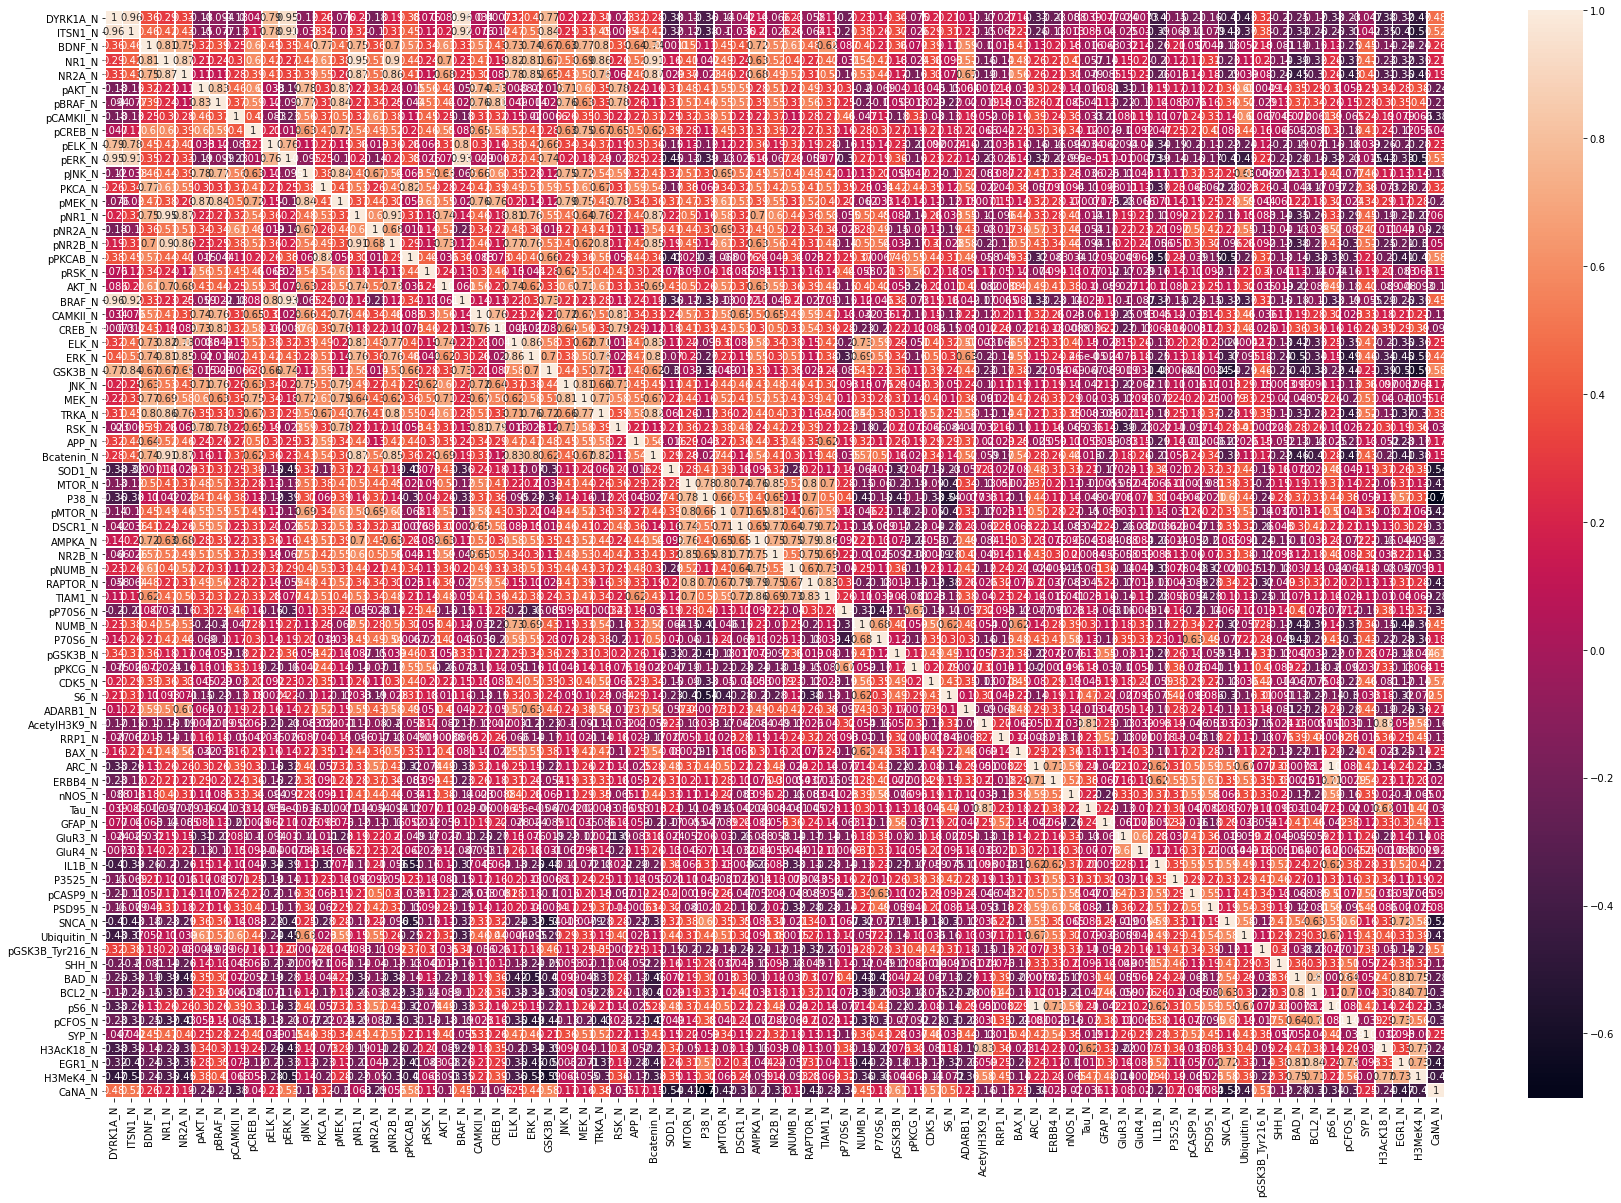

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(mice.corr(),annot=True,linewidth=0.5)

In [11]:
mice.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [12]:
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [13]:
pd.set_option('display.max_columns', None)
mice.head(1)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.60331,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m


In [14]:
mice.dropna()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,0.969466,0.321260,0.406562,0.255293,1.056343,1.099300,1.925284,2.231671,0.426859,0.873228,0.512773,0.343220,0.167629,1.852756,3.366492,1.503675,0.246019,0.305424,0.851006,0.165179,0.441557,2.578215,0.340857,0.487664,0.401050,0.781365,0.534033,0.431846,0.618023,0.361417,0.321960,0.427297,0.252056,0.242086,1.061181,0.163758,1.862368,0.321175,0.541041,2.159547,0.134639,0.158178,0.196124,0.132001,0.161120,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.687551,2.436587,0.168172,1.139154,0.987774,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,0.991845,0.342918,0.396910,0.270815,1.032790,1.078712,1.893047,2.330987,0.409185,0.789013,0.511502,0.344807,0.166695,1.852532,3.431159,1.471674,0.242060,0.300172,0.833648,0.162661,0.437253,2.538026,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,0.603176,0.360258,0.296052,0.425837,0.252017,0.242120,1.063985,0.169981,1.692204,0.320473,0.539226,2.167098,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.662872,2.354728,0.174704,1.227851,0.981655,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,0.989999,0.328976,0.397930,0.263795,1.092289,1.094043,1.915958,1.952540,0.454075,0.793754,0.533205,0.352048,0.172559,1.965786,3.434249,1.541802,0.251952,0.345908,0.881393,0.165278,0.443460,2.609615,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,0.640232,0.374331,0.299675,0.445214,0.252303,0.241042,1.059453,0.175230,1.654840,0.317856,0.561875,2.182447,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.204300,0.129555,0.270062,0.153629,0.506309,0.349753,1.716362,2.437317,0.156001,1.226103,0.994146,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.755842,2.297212,0.484818,0.742183,0.459194,0.337510,0.161982,1.364714,2.814990,1.440795,0.234902,0.274975,0.766452,0.150581,0.407608,2.311999,0.312112,0.466305,0.394740,0.740603,0.522971,0.391918,0.585055,0.345186,0.286714,0.399932,0.277458,0.208718,0.969007,0.153779,2.027937,0.299825,0.466762,1.795148,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.316600,1.586368,2.382140,0.145049,1.056498,0.970067,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,0.815057,0.315001,0.391525,0.254142,0.955370,0.938465,1.744844,2.477854,0.476502,0.715880,0.486307,0.338668,0.160600,1.398174,2.891018,1.469402,0.234870,0.270033,0.755438,0.149555,0.411360,2.320861,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,0.587400,0.346557,0.290319,0.405838,0.354671,0.212714,0.972906,0.163062,1.969799,0.303008

In [15]:
pd.set_option('display.max_rows', None)
mice.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
APP_N              float64
Bcatenin_N         float64
SOD1_N             float64
MTOR_N             float64
P38_N              float64
pMTOR_N            float64
D

In [16]:
mice[['MouseID','Genotype','Treatment','Behavior','class']].isnull().sum()

MouseID      0
Genotype     0
Treatment    0
Behavior     0
class        0
dtype: int64

In [17]:
numeric=mice.drop(columns=['MouseID','Genotype','Treatment','Behavior','class'])
categorical=mice[['MouseID','Genotype','Treatment','Behavior','class']]

In [18]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
mice_filled = my_imputer.fit_transform(numeric)
df=pd.DataFrame(mice_filled)
df.columns=numeric.columns

In [19]:
combined=categorical.join(df)
combined.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,0.344829,0.051906,0.052164,0.046099,0.117805,0.187752,0.270361,0.481110,0.066579,0.127257,0.216087,0.052279,0.026334,0.332973,0.652488,0.244411,0.033854,0.040942,0.120657,0.028099,0.061088,0.432092,0.280178,0.065397,0.089166,0.122276,0.100461,0.062496,0.088079,0.062938,0.054087,0.067194,0.155953,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.026461,0.023519,0.014276,0.023018,0.066432,0.054222,0.036261,0.048069,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,0.337486,0.281530,0.281850,0.244294,0.743594,0.591311,1.381308,1.168648,0.404152,0.597317,0.264356,0.330887,0.161867,0.947889,1.993693,1.023321,0.220425,0.247322,0.617329,0.149639,0.366469,1.830090,0.319712,0.410961,0.352023,0.683557,0.531223,0.326750,0.515099,0.312771,0.276193,0.372059,0.2821

In [20]:
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

In [21]:
import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [22]:
X=combined.loc[:,'DYRK1A_N':'CaNA_N']
y=combined['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=1)

In [24]:
clf.feature_importances_

array([0.02549951, 0.02526158, 0.00598787, 0.00671213, 0.00616128,
       0.00839692, 0.00754812, 0.02761191, 0.00912855, 0.00613644,
       0.02567323, 0.00755604, 0.0117592 , 0.00853682, 0.00899171,
       0.00990296, 0.0050227 , 0.02500598, 0.00956975, 0.0189484 ,
       0.02228852, 0.01068037, 0.00525351, 0.00568663, 0.00615284,
       0.00932388, 0.00652094, 0.00478656, 0.0064127 , 0.00503361,
       0.03306431, 0.00512745, 0.05888193, 0.01317917, 0.02187054,
       0.01113541, 0.00734895, 0.00617851, 0.00924756, 0.01818916,
       0.01142312, 0.00726631, 0.02063555, 0.00956539, 0.00723165,
       0.0197743 , 0.03932266, 0.00763121, 0.01711924, 0.00996198,
       0.01731056, 0.01065546, 0.00891813, 0.02676612, 0.01007979,
       0.0123347 , 0.02286707, 0.00717876, 0.00936105, 0.00461358,
       0.00937433, 0.00950679, 0.00659873, 0.01040857, 0.00947998,
       0.0327402 , 0.00706753, 0.00721778, 0.00657862, 0.00585685,
       0.01945447, 0.00438356, 0.00725358, 0.01204878, 0.00356

In [25]:
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9837962962962963

In [26]:
lr=LogisticRegression()

# fitting the model to the training data
lr.fit(X_train, y_train)

# use the model to predict on the testing data
lr.predict(X_test)

# Printing the accuracy of the model
score = lr.score(X_test, y_test)
score

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.875

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#Making a new model to predict genotypes to make an ROC curve
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_train, y_train)

#Getting the accuracy
pred_gen = kgmodel.predict(X_test)
accuracy_score(pred_gen, y_test)

0.9027777777777778